<a href="https://colab.research.google.com/github/UdayLab/intro2BigData/blob/main/class_6/frequentPatternMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering Frequent Patterns from the Customers Purchase Data

This notebook provide the demo of extracting useful and interesting customer purchase patterns in the data

# Step 0: Download the transactional database

The processed used to create the transactional database from the raw customer purchase data is shown in https://colab.research.google.com/github/UdayLab/intro2BigData/blob/main/class_4/dataTransformation.ipynb

In [ ]:
!wget -nc https://raw.githubusercontent.com/UdayLab/intro2BigData/main/class_6/transactionalDatabase.csv

--2023-12-27 13:00:36--  https://raw.githubusercontent.com/UdayLab/intro2BigData/main/class_6/transactionalDatabase.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14915216 (14M) [text/plain]
Saving to: ‘transactionalDatabase.csv’

transactionalDataba 100%[===================>]  14.22M  --.-KB/s    in 0.06s   

2023-12-27 13:00:37 (246 MB/s) - ‘transactionalDatabase.csv’ saved [14915216/14915216]



In [ ]:
!head transactionalDatabase.csv

WHITE HANGING HEART T-LIGHT HOLDER	WHITE METAL LANTERN	CREAM CUPID HEARTS COAT HANGER	KNITTED UNION FLAG HOT WATER BOTTLE	RED WOOLLY HOTTIE WHITE HEART.	SET 7 BABUSHKA NESTING BOXES	GLASS STAR FROSTED T-LIGHT HOLDER	
HAND WARMER UNION JACK	HAND WARMER RED POLKA DOT	
ASSORTED COLOUR BIRD ORNAMENT	POPPY'S PLAYHOUSE BEDROOM 	POPPY'S PLAYHOUSE KITCHEN	FELTCRAFT PRINCESS CHARLOTTE DOLL	IVORY KNITTED MUG COSY 	BOX OF 6 ASSORTED COLOUR TEASPOONS	BOX OF VINTAGE JIGSAW BLOCKS 	BOX OF VINTAGE ALPHABET BLOCKS	HOME BUILDING BLOCK WORD	LOVE BUILDING BLOCK WORD	RECIPE BOX WITH METAL HEART	DOORMAT NEW ENGLAND	
JAM MAKING SET WITH JARS	RED COAT RACK PARIS FASHION	YELLOW COAT RACK PARIS FASHION	BLUE COAT RACK PARIS FASHION	
BATH BUILDING BLOCK WORD	
ALARM CLOCK BAKELIKE PINK	ALARM CLOCK BAKELIKE RED 	ALARM CLOCK BAKELIKE GREEN	PANDA AND BUNNIES STICKER SHEET	STARS GIFT TAPE 	INFLATABLE POLITICAL GLOBE 	VINTAGE HEADS AND TAILS CARD GAME 	SET/2 RED RETROSPOT TEA TOWELS 	ROUND SNACK BOXES SET OF4 WOODLAND

# Step 1: Check the format of the database.

An item contains words with white spaces. Items in a transaction are seperated with tab space

In [ ]:
!head transactionalDatabase.csv

WHITE HANGING HEART T-LIGHT HOLDER	WHITE METAL LANTERN	CREAM CUPID HEARTS COAT HANGER	KNITTED UNION FLAG HOT WATER BOTTLE	RED WOOLLY HOTTIE WHITE HEART.	SET 7 BABUSHKA NESTING BOXES	GLASS STAR FROSTED T-LIGHT HOLDER	
HAND WARMER UNION JACK	HAND WARMER RED POLKA DOT	
ASSORTED COLOUR BIRD ORNAMENT	POPPY'S PLAYHOUSE BEDROOM 	POPPY'S PLAYHOUSE KITCHEN	FELTCRAFT PRINCESS CHARLOTTE DOLL	IVORY KNITTED MUG COSY 	BOX OF 6 ASSORTED COLOUR TEASPOONS	BOX OF VINTAGE JIGSAW BLOCKS 	BOX OF VINTAGE ALPHABET BLOCKS	HOME BUILDING BLOCK WORD	LOVE BUILDING BLOCK WORD	RECIPE BOX WITH METAL HEART	DOORMAT NEW ENGLAND	
JAM MAKING SET WITH JARS	RED COAT RACK PARIS FASHION	YELLOW COAT RACK PARIS FASHION	BLUE COAT RACK PARIS FASHION	
BATH BUILDING BLOCK WORD	
ALARM CLOCK BAKELIKE PINK	ALARM CLOCK BAKELIKE RED 	ALARM CLOCK BAKELIKE GREEN	PANDA AND BUNNIES STICKER SHEET	STARS GIFT TAPE 	INFLATABLE POLITICAL GLOBE 	VINTAGE HEADS AND TAILS CARD GAME 	SET/2 RED RETROSPOT TEA TOWELS 	ROUND SNACK BOXES SET OF4 WOODLAND

# Step 2: Check the total number of transactions in the database

In [ ]:
!wc -l transactionalDatabase.csv

24446 transactionalDatabase.csv


# Step 3: Install the PAMI library

In [ ]:
!pip install pami

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.7/884.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 61.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.5 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=84a7e0a7442e1f93f616f4b5c0b80dde4f3dc53ac1b19a47d2dbd11470cb626b
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4753 sha256=231dfa5f898baf81eae8ee58d1c184fee14c2561b9e2ce9cb6bd406e00c643af
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


# Step 4: Check the statistics of the transactional database

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as alg

In [ ]:
obj = alg.TransactionalDatabase('transactionalDatabase.csv')

In [ ]:
obj.run()

In [ ]:
obj.printStats()

Database size (total no of transactions) : 24446
Number of items : 4192
Minimum Transaction Size : 1
Average Transaction Size : 22.108115847173362
Maximum Transaction Size : 1114
Standard Deviation Transaction Size : 44.00843487619885
Variance in Transaction Sizes : 1936.821568820451
Sparsity : 0.9948412547237625


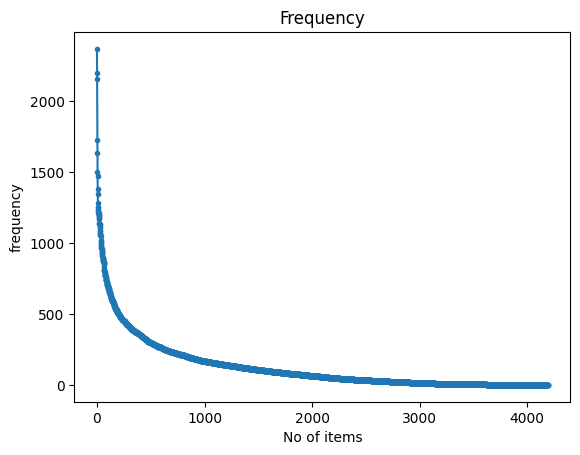

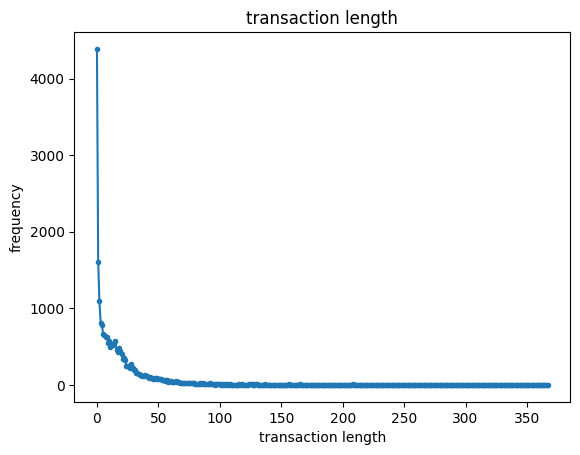

In [ ]:
obj.plotGraphs()

# Step 5: Find the frequent patterns in the transactional database using the Apriori algorithm

In [ ]:
from PAMI.frequentPattern.basic import Apriori as alg1

In [ ]:
obj1= alg1.Apriori('transactionalDatabase.csv',400)

In [ ]:
obj1.startMine()

Frequent patterns were generated successfully using Apriori algorithm 


In [ ]:
obj1.save('frequentPatterns_400.txt')

**IMPORTANT:** Open the saved file and check out the patterns.